# Visualizing Data with Pandas, Matplotlib, and Seaborn

[Matplotlib](http://matplotlib.org) is basic plotting library for Python inspired by Matlab. 
[Seaborn](http://stanford.edu/~mwaskom/software/seaborn) is built on top of matplotlib with integrated analysis and specialized plots.

Also see [the full gallery of Seaborn](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html) or [Matplotlib](http://matplotlib.org/gallery.html).

We're going to be using data on football player attributes from FIFA 2017. Why? Well, because it's fun, it's highly multi-dimensional, and we can process the data in an infinite number of ways. The [dataset](https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global) has some other parts too, in case you're interested in continuing poking around this data. 


In [130]:
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from pandas.tools.plotting import radviz, parallel_coordinates, andrews_curves
import numpy as np

## Load Data

Here we're going to use the gapminder data, from the famous work of Hans Rosling. 


In [131]:
fifa = pd.read_csv('data/fifa_player_data.csv')

In [132]:
sorted(list(fifa.columns))

['Acceleration',
 'Age',
 'Aggression',
 'Agility',
 'Attacking_Position',
 'Balance',
 'Ball_Control',
 'Birth_Date',
 'Club',
 'Club_Joining',
 'Club_Kit',
 'Club_Position',
 'Composure',
 'Contract_Expiry',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Freekick_Accuracy',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Heading',
 'Height',
 'Interceptions',
 'Jumping',
 'Long_Pass',
 'Long_Shots',
 'Marking',
 'Name',
 'National_Kit',
 'National_Position',
 'Nationality',
 'Penalties',
 'Preffered_Foot',
 'Preffered_Position',
 'Rating',
 'Reactions',
 'Short_Pass',
 'Shot_Power',
 'Skill_Moves',
 'Sliding_Tackle',
 'Speed',
 'Stamina',
 'Standing_Tackle',
 'Strength',
 'Vision',
 'Volleys',
 'Weak_foot',
 'Weight',
 'Work_Rate']

In [45]:
fifa.head(5)

Name Nationality National_Position  National_Kit  \
0  Cristiano Ronaldo    Portugal                LS           7.0   
1       Lionel Messi   Argentina                RW          10.0   
2             Neymar      Brazil                LW          10.0   
3        Luis Suárez     Uruguay                LS           9.0   
4       Manuel Neuer     Germany                GK           1.0   

           Club Club_Position  Club_Kit Club_Joining  Contract_Expiry  Rating  \
0   Real Madrid            LW       7.0   07/01/2009           2021.0      94   
1  FC Barcelona            RW      10.0   07/01/2004           2018.0      93   
2  FC Barcelona            LW      11.0   07/01/2013           2021.0      92   
3  FC Barcelona            ST       9.0   07/11/2014           2021.0      92   
4     FC Bayern            GK       1.0   07/01/2011           2021.0      92   

      ...      Long_Shots Curve Freekick_Accuracy Penalties  Volleys  \
0     ...              90    81                76        85       88   
1     ...              88    89                90        74       85   
2     ...              77    79                84        81       83   
3     ...              86    86                84        85       88   
4     ...              16    14                11        47       11   

  GK_Positioning GK_Diving  GK_Kicking  GK_Handling  GK_Reflexes  
0             14         7          15           11           11  
1             14         6          15           11            8  
2             15         9          15            9           11  
3             33        27          31           25           37  
4             91        89          95           90           89  

[5 rows x 53 columns]

In [47]:
# We can also sort the data in any number of ways
fifa.sort_values('Acceleration', ascending=False).head(5)

Name  Nationality National_Position  National_Kit  \
420   Héctor Bellerín        Spain               NaN           NaN   
4926    Kekuta Manneh       Gambia               NaN           NaN   
101     Douglas Costa       Brazil               Sub           7.0   
8305     Mathis Bolly  Ivory Coast               NaN           NaN   
212             Lucas       Brazil               NaN           NaN   

                Club Club_Position  Club_Kit Club_Joining  Contract_Expiry  \
420          Arsenal            RB      24.0   07/01/2014           2023.0   
4926    Whitecaps FC            LM      23.0   01/01/2013           2022.0   
101        FC Bayern            LM      11.0   07/01/2015           2020.0   
8305  Greuther Fürth           Sub      14.0   07/01/2016           2018.0   
212              PSG           Sub       7.0   01/01/2013           2019.0   

      Rating     ...      Long_Shots Curve Freekick_Accuracy Penalties  \
420       80     ...              43    63                50        62   
4926      70     ...              65    54                49        59   
101       84     ...              84    81                78        77   
8305      67     ...              52    56                29        56   
212       82     ...              71    69                74        75   

      Volleys GK_Positioning GK_Diving  GK_Kicking  GK_Handling  GK_Reflexes  
420        41             13         8          14           14           12  
4926       57             10         9          14           11            9  
101        73             12        13           9           15            5  
8305       64             12         6           6           11            6  
212        70              7         9          14           10           14  

[5 rows x 53 columns]

In [49]:
# We can also make the sort work on numerous values
fifa.sort_values(['Acceleration', 'Curve'], ascending=False).head(5)

Name  Nationality National_Position  National_Kit  \
101               Douglas Costa       Brazil               Sub           7.0   
420             Héctor Bellerín        Spain               NaN           NaN   
8305               Mathis Bolly  Ivory Coast               NaN           NaN   
4926              Kekuta Manneh       Gambia               NaN           NaN   
35    Pierre-Emerick Aubameyang        Gabon               NaN           NaN   

                Club Club_Position  Club_Kit Club_Joining  Contract_Expiry  \
101        FC Bayern            LM      11.0   07/01/2015           2020.0   
420          Arsenal            RB      24.0   07/01/2014           2023.0   
8305  Greuther Fürth           Sub      14.0   07/01/2016           2018.0   
4926    Whitecaps FC            LM      23.0   01/01/2013           2022.0   
35     Bor. Dortmund            ST      17.0   07/04/2013           2020.0   

      Rating     ...      Long_Shots Curve Freekick_Accuracy Penalties  \
101       84     ...              84    81                78        77   
420       80     ...              43    63                50        62   
8305      67     ...              52    56                29        56   
4926      70     ...              65    54                49        59   
35        87     ...              79    78                74        82   

      Volleys GK_Positioning GK_Diving  GK_Kicking  GK_Handling  GK_Reflexes  
101        73             12        13           9           15            5  
420        41             13         8          14           14           12  
8305       64             12         6           6           11            6  
4926       57             10         9          14           11            9  
35         86              9         6          15            9            9  

[5 rows x 53 columns]

## Grouping

We can even group items much like we'd do in SQL, perform calculations on some aggregated property, then plot values, just to get an idea of larger scale trends

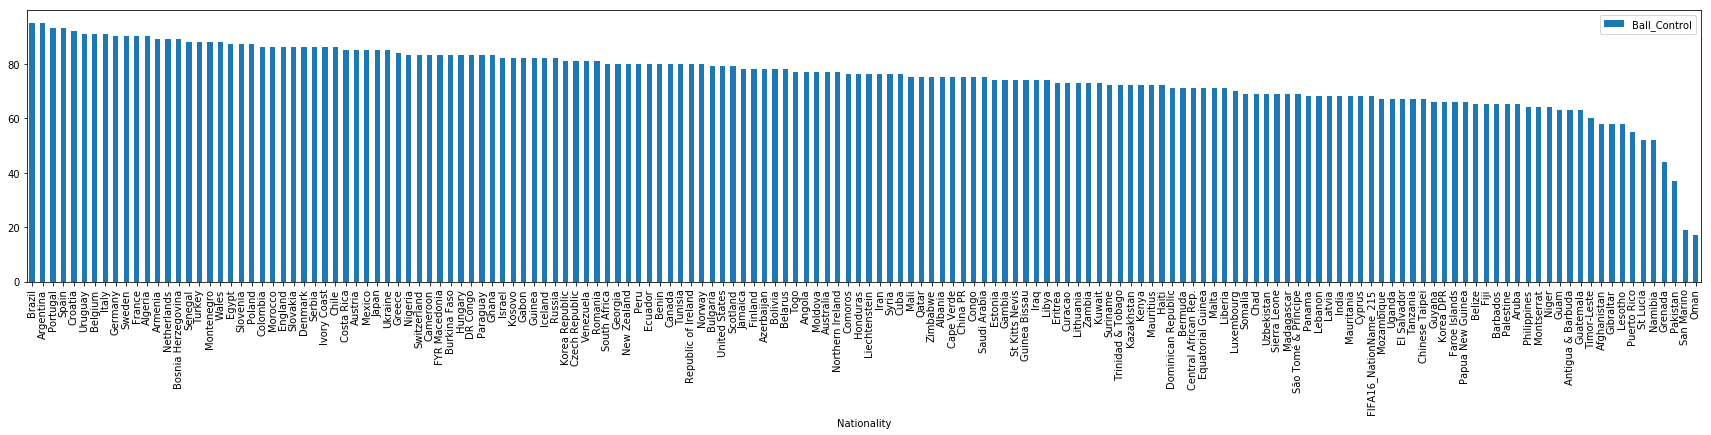

In [50]:
fifa.groupby('Nationality').agg({'Ball_Control':'max'}).sort_values('Ball_Control', ascending=False).plot(kind='bar', figsize=(30, 5))

<p style="color:#f1c40f; font-size: 2em">Exercise 1</p>

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">Which <strong>Club_Position</strong> has the players with the highest average <strong>Speed</strong>?</p>

In [4]:
# Answer 1

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">Which <strong>Club_Position</strong> has the players with the highest average <strong>Speed</strong> variance?</p>

In [3]:
# Answer 2

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">Which <strong>Club</strong> has the players with the highest average <strong>Speed</strong>?</p>

In [2]:
# Answer 3

### Histograms

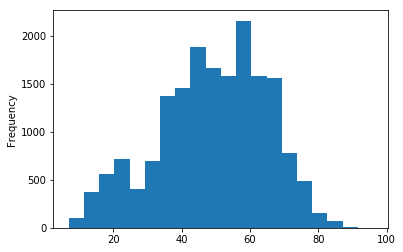

In [51]:
# We can plot 
fifa.Penalties.plot(kind='hist', bins=20)

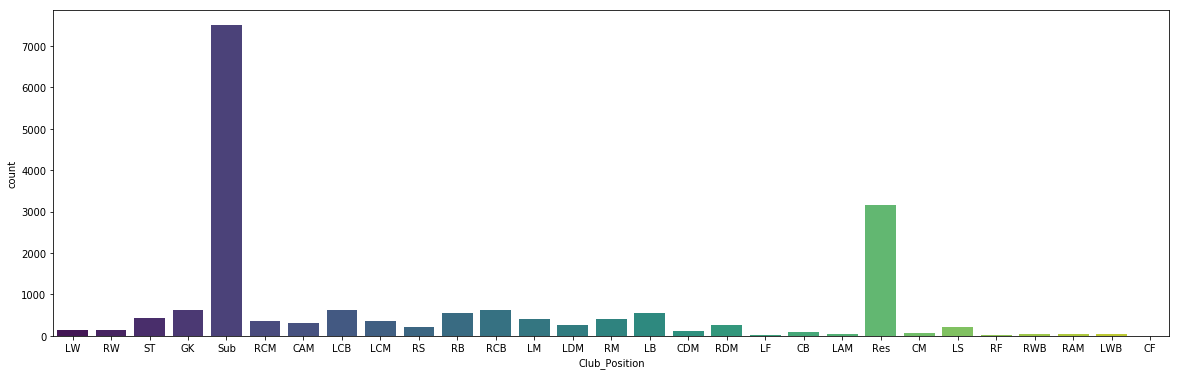

In [56]:
plt.figure(figsize=(20,6))
sns.countplot('Club_Position', data=fifa, palette='viridis')

This data is a at first glance at little strange. Unfortunately, in FIFA, many players in a squad will not be in the first team. Therefore we have many players classified as 'Sub' or 'Res'. We also have some CF (Centre Forwards) but this is the same as a 'ST' (Striker). 

** Many of our analyses may not care about the position, but in the ones that do, we should ideally clean our data. **

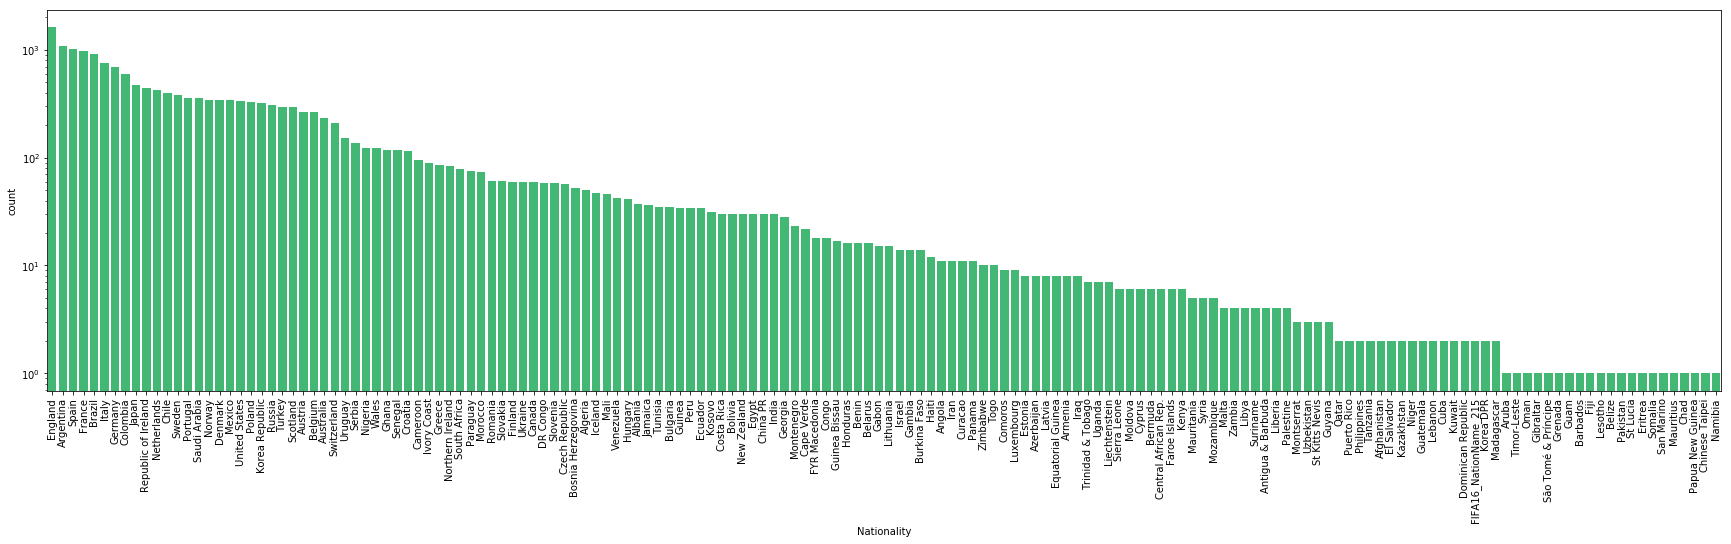

In [57]:
fig = plt.figure(figsize=(30, 7))
g = sns.countplot('Nationality', data=fifa, palette=sns.color_palette(['#2ecc71']), order=fifa.groupby('Nationality').size().sort_values(ascending=False).index)
# This rotates the labels, otherwise, we can't see anything!
plt.setp(g.get_xticklabels(), rotation=90)
g.figure.get_axes()[0].set_yscale('log')

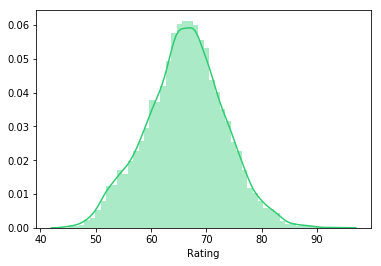

In [60]:
# seaborn also offers not just a histogram but also an kernel density enstimation
sns.distplot(fifa.Rating,bins=50, color='#2ecc71')

<p style="color:#f1c40f; font-size: 2em">Exercise 2</p>

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">EASY: Plot the distributions for <strong>Acceleration</strong>.</p>

In [5]:
# Answer 4

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">ADVANCED: Plot two histograms, one on top of the other for <strong>Acceleration</strong> of Italian Players vs Brazilian players.</p>

In [6]:
# Answer 5

### Box Plots

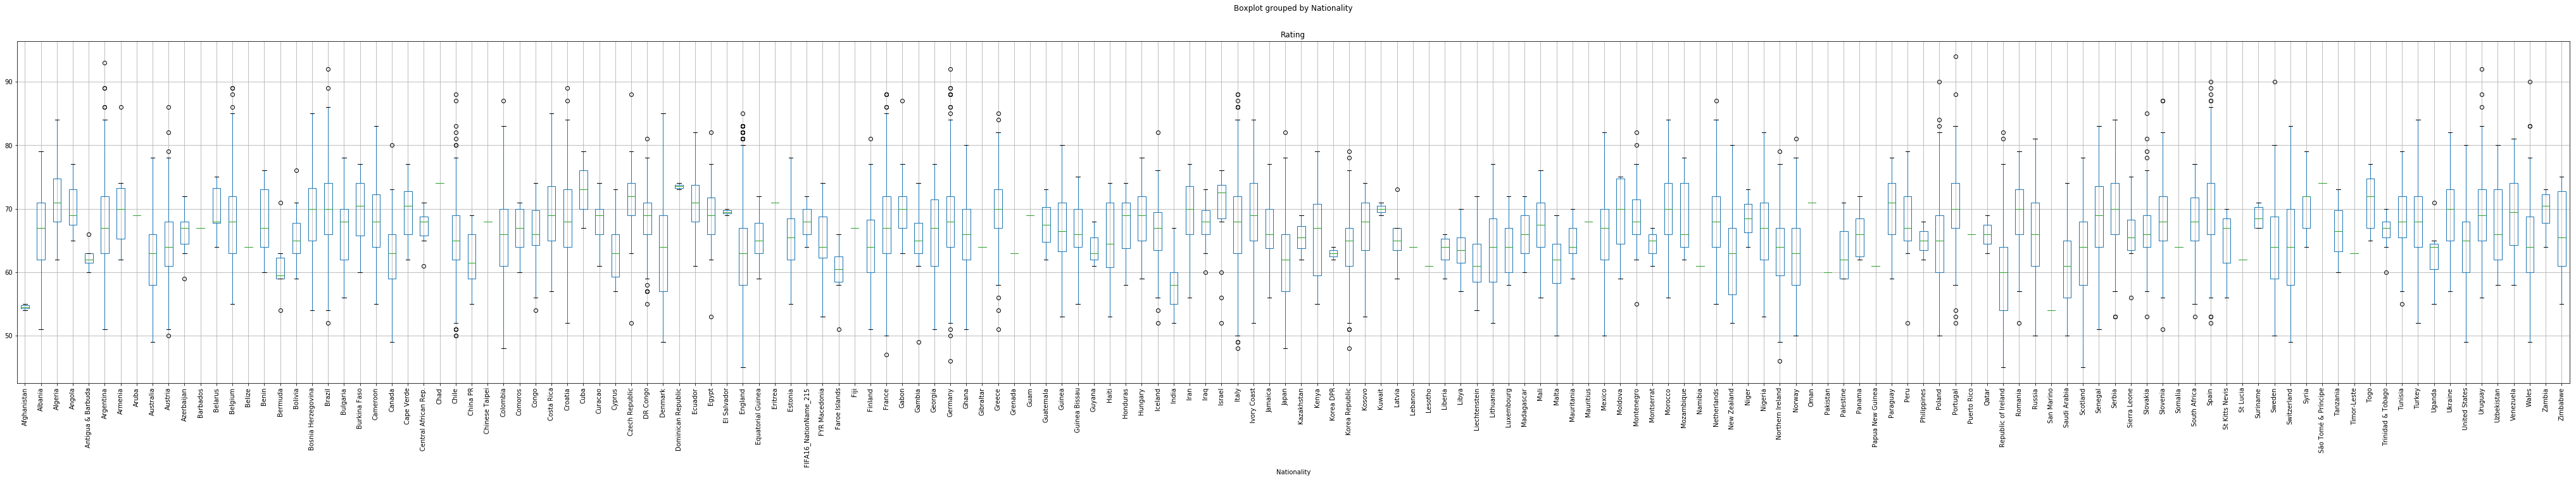

In [62]:
#group by continent
fifa.boxplot('Rating', by='Nationality', rot=90, figsize=(70, 10))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

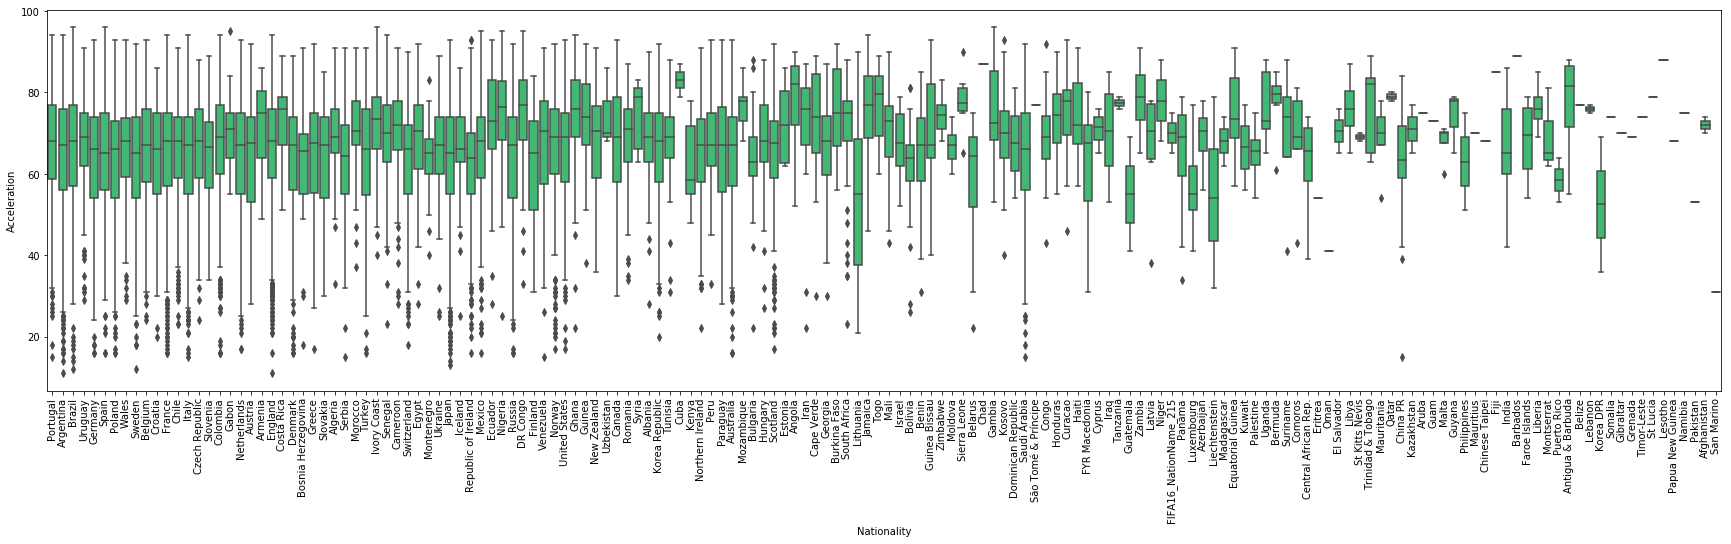

In [63]:
# Or, we can use seaborn, which has a nicer styling by default.
fig = plt.figure(figsize=(30, 7))
g = sns.boxplot(x="Nationality", y="Acceleration", data=fifa, palette=sns.color_palette(['#2ecc71']))
plt.setp(g.get_xticklabels(), rotation=90)

### Violin Plots

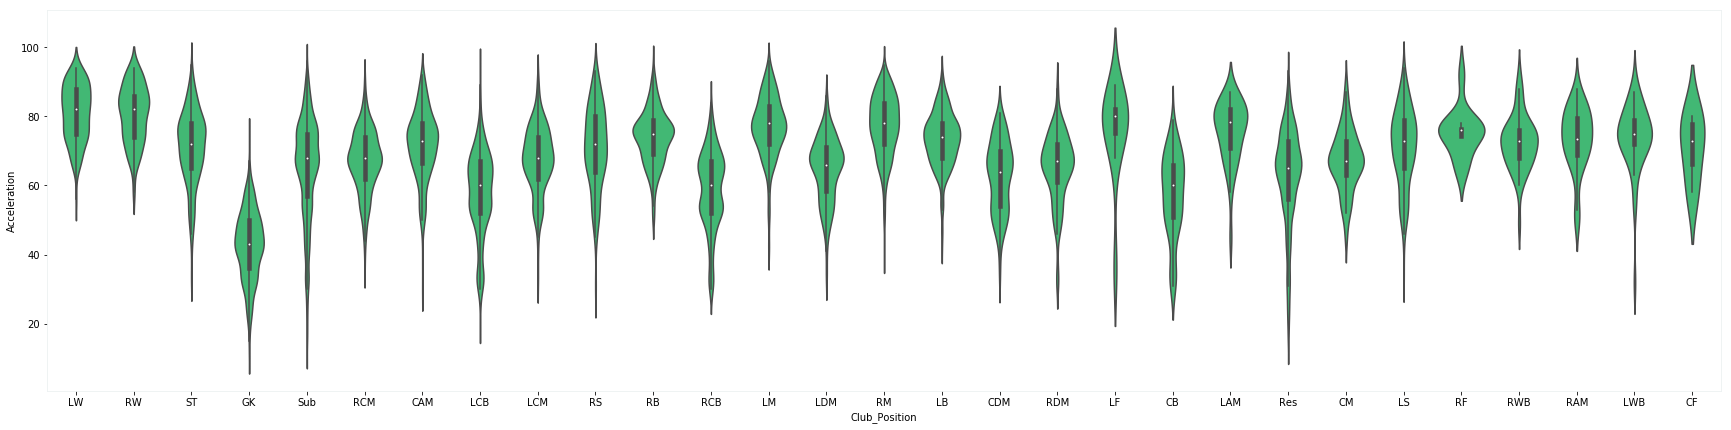

In [105]:
# Violin plots do a better job of showing us the number of support points across the distribution
fig = plt.figure(figsize=(30, 7))
g = sns.violinplot(x="Club_Position", y="Acceleration", data=fifa, palette=sns.color_palette(['#2ecc71']))

### Boxen Plots

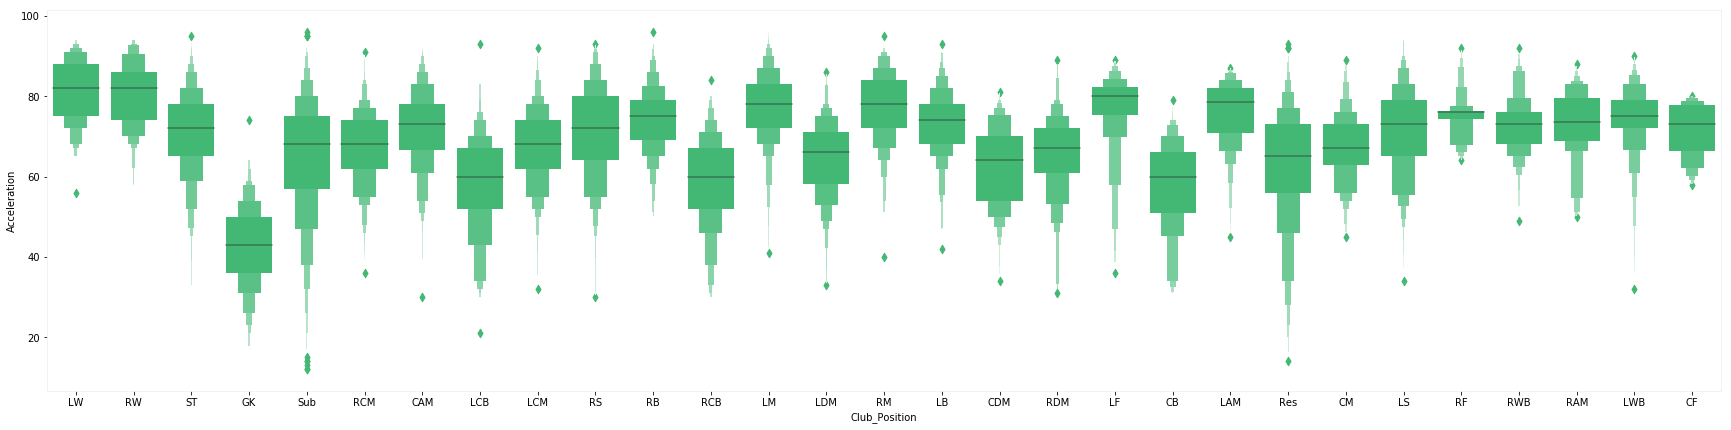

In [104]:
# Boxen Plots do an equally good job of showing us how many points on the Y axis by having a rectangle that scales
# by the number of points in each bin.
fig = plt.figure(figsize=(30, 7))
g = sns.boxenplot(x="Club_Position", y="Acceleration", data=fifa, palette=sns.color_palette(['#2ecc71']))

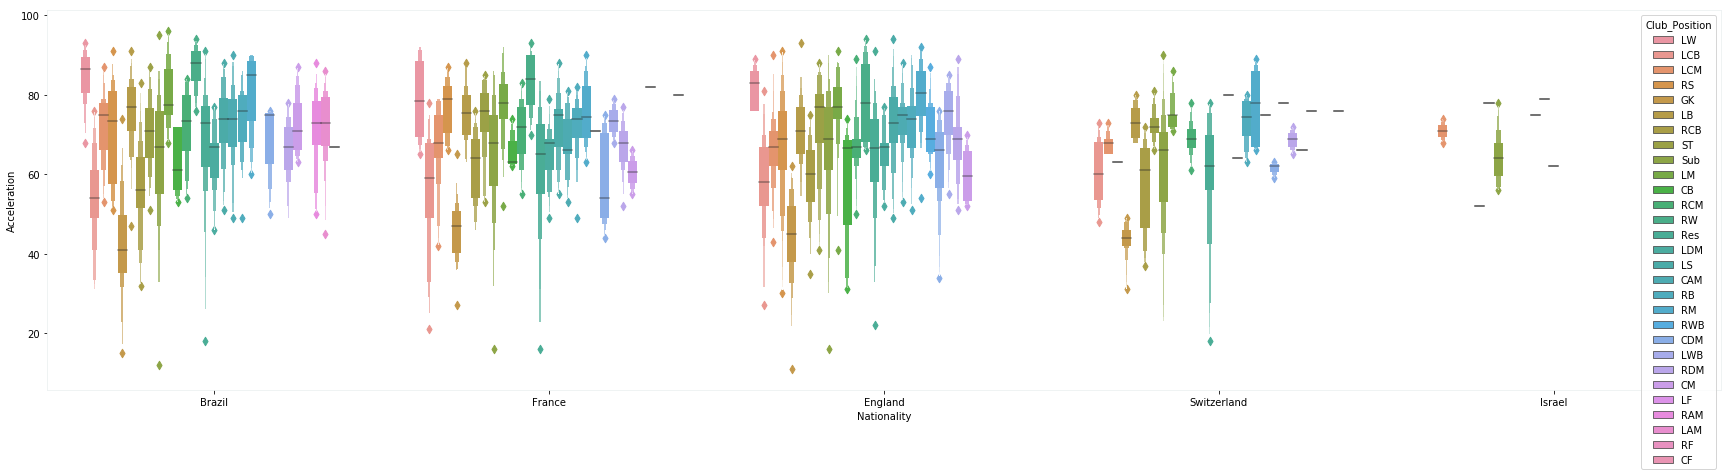

In [109]:
# Let's group by Country and Show Position Differences
fig = plt.figure(figsize=(30, 7))
g = sns.boxenplot(x="Nationality", y="Acceleration", hue="Club_Position", data=fifa[fifa.Nationality.isin(['Brazil', 'England', 'France', 'Switzerland', 'Israel'])])

<p style="color:#f1c40f; font-size: 2em">Exercise 3</p>

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">ADVANCED: How can we sort the values of the box plots so that they are ordered by mean?</p>

In [7]:
# Answer 6

## Plotting Joint Distributions

We can also look at the correlations between variables in the traditional scatter plot. We can create them in a number of ways.

### Scatter Plots

Text(0, 0.5, 'Speed')

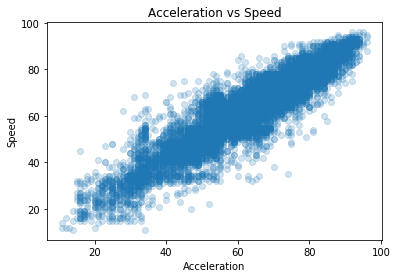

In [64]:
# The first way is using Matplotlib
plt.scatter(x=fifa['Acceleration'],y=fifa['Speed'], alpha=0.2)
plt.title('Acceleration vs Speed')
plt.xlabel('Acceleration')
plt.ylabel('Speed')

We can also create one image with many plots inside. Here we'll create a number of 

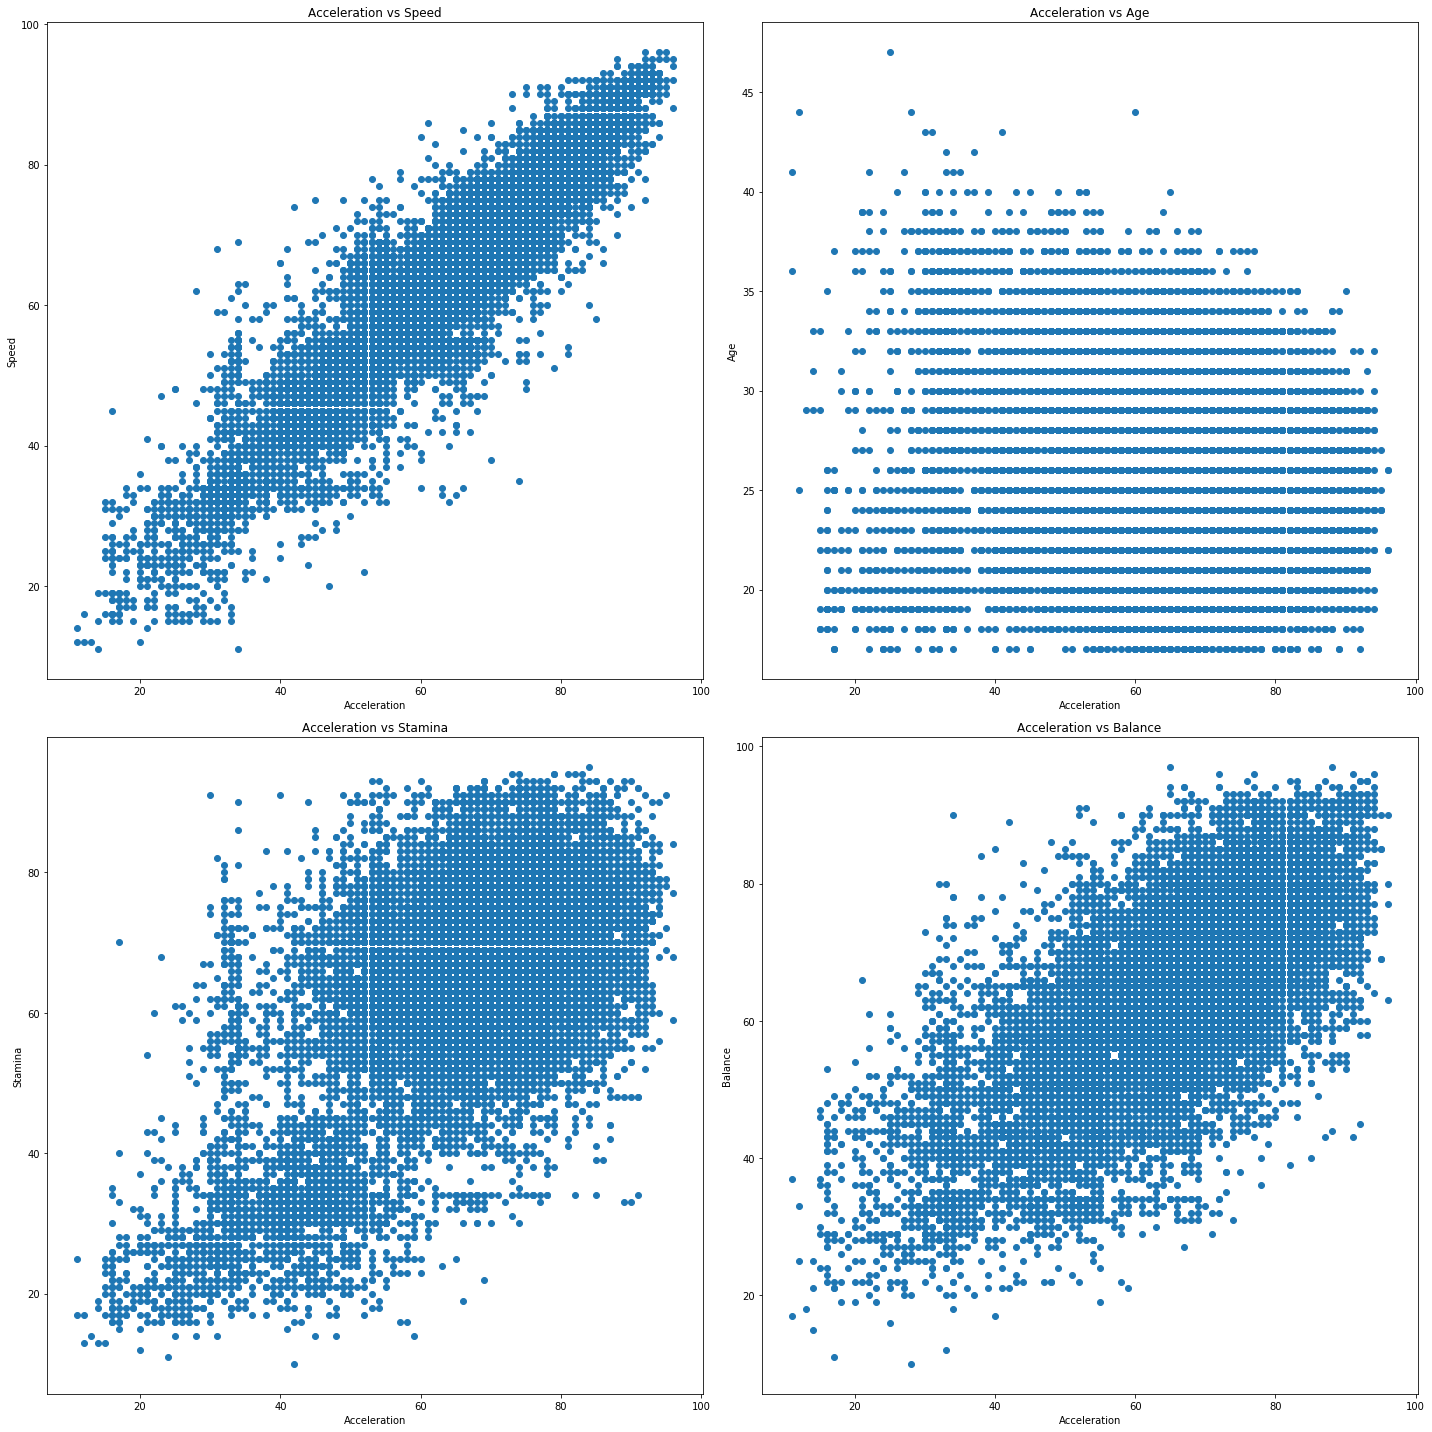

In [65]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,20))

axes[0,0].scatter(x=fifa['Acceleration'],y=fifa['Speed'])
axes[0,0].title.set_text('Acceleration vs Speed')
axes[0,0].set_ylabel('Speed')
axes[0,0].set_xlabel('Acceleration')

axes[0,1].scatter(x=fifa['Acceleration'],y=fifa['Age'])
axes[0,1].title.set_text('Acceleration vs Age')
axes[0,1].set_xlabel('Acceleration')
axes[0,1].set_ylabel('Age')

axes[1,1].scatter(x=fifa['Acceleration'],y=fifa['Balance'])
axes[1,1].title.set_text('Acceleration vs Balance')
axes[1,1].set_xlabel('Acceleration')
axes[1,1].set_ylabel('Balance')


axes[1,0].scatter(x=fifa['Acceleration'],y=fifa['Stamina'])
axes[1,0].title.set_text('Acceleration vs Stamina')
axes[1,0].set_xlabel('Acceleration')
axes[1,0].set_ylabel('Stamina')

plt.tight_layout()
plt.show()

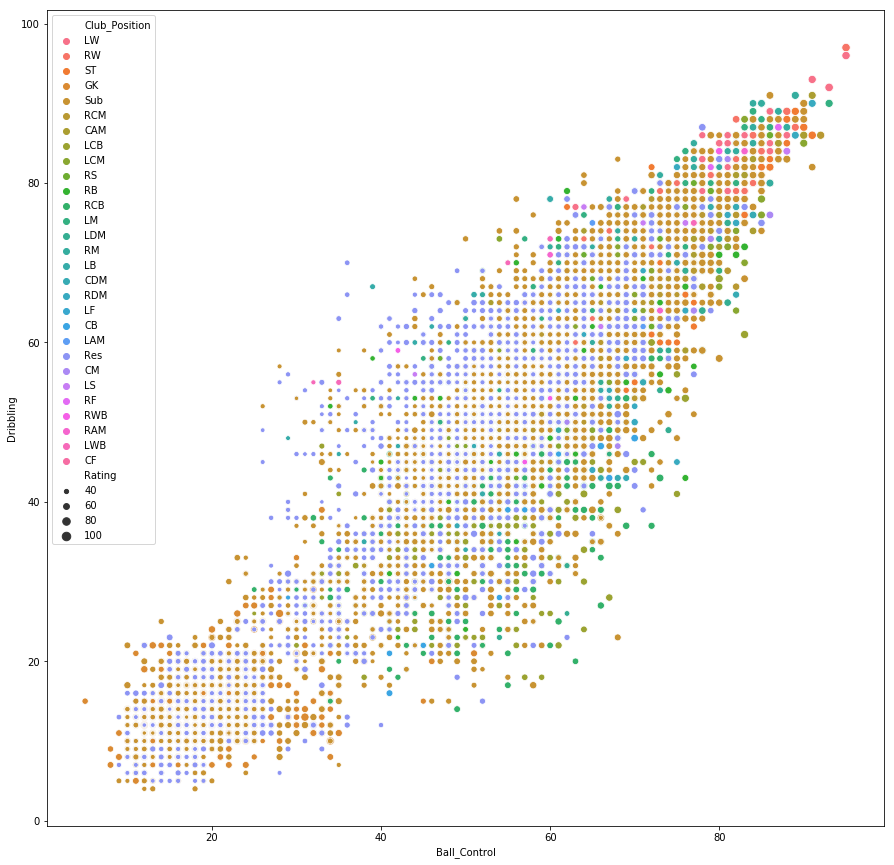

In [73]:
plt.figure(figsize=(15,15))
g = sns.scatterplot("Ball_Control", "Dribbling", hue='Club_Position', size='Rating', data=fifa, color="#555555")

### Joint Plots

Seaborn offers a lot of functionality out of the box.
For instance, the joint plot gives us both histograms for the distributions of each variable, and also the joint distribution in the form of a scatter plot.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


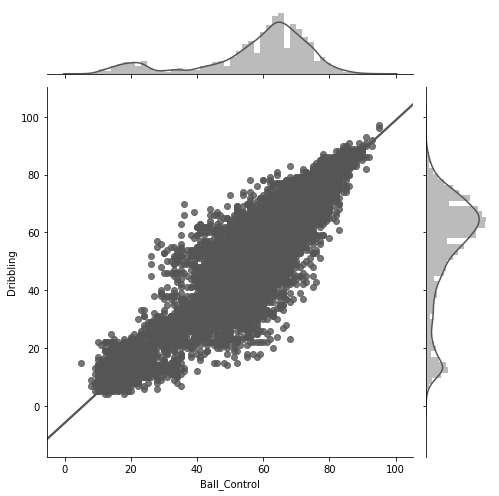

In [77]:
sns.jointplot("Ball_Control", "Dribbling", data=fifa, kind="reg", color="#555555", size=7)

<p style="color:#f1c40f; font-size: 2em">Exercise 4</p>

<br/>
<div style="background: #f1c40f; padding: 10px; color: #2c3e50"><p>EASY: Which features are more correlated? </p>
<ul>
<li><strong>Dribbling</strong> and <strong>Speed</strong>;</li>
<li><strong>Dribbling</strong> and <strong>Balance</strong>; or</li>
<li><strong>Dribbling</strong> and <strong>Agility</strong></li>
</ul>
</div>

In [8]:
# Answer 7

## Multivariate Distributions

So far, we've seen how we can we can visualize one or two variables and their distributions, but we often have many more variables. Therefore we'd like to be able to visualize more at once to discover areas of interest.

### Scatter Plot Matrices

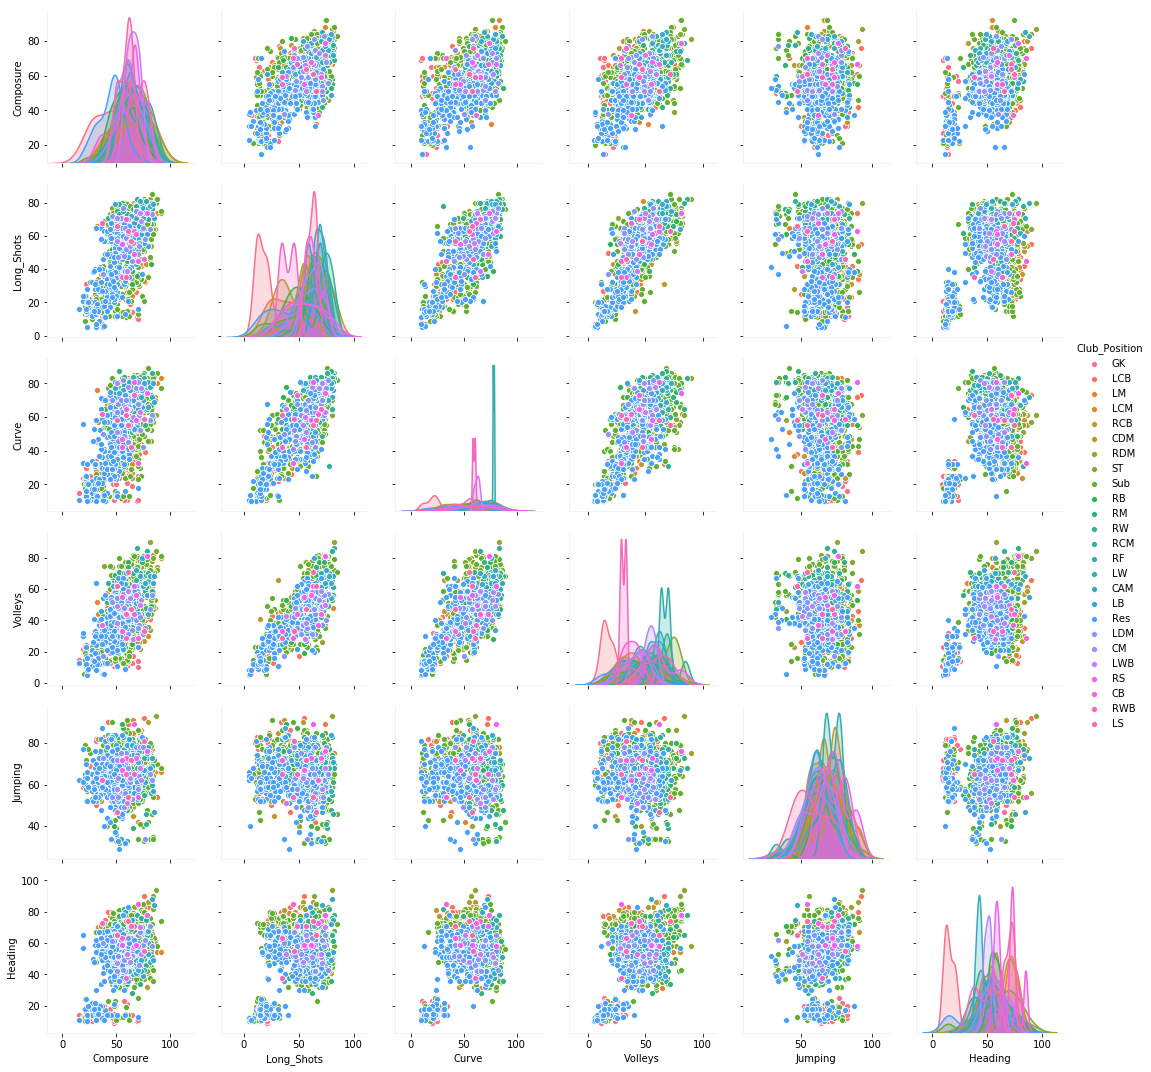

In [110]:
# We can do this pretty easily with Seaborn, however, for very large data frames, 
# this is computationally expensive to plot. So we'll focus on one country, Spain!
sns.pairplot(fifa[fifa.Nationality=='Spain'][['Composure', 'Long_Shots', 
                                              'Curve', 'Volleys', 'Jumping', 
                                              'Heading', 'Club_Position']], hue='Club_Position')

<p style="color:#f1c40f; font-size: 2em">Exercise 5</p>

<br/>
<div style="background: #f1c40f; padding: 10px; color: #2c3e50"><p>EASY: This is a great example of a potentially nice visualization can be messed up by a terrible colour map.<br/>
How would you go about improving this visualization?</p>
</div>

In [9]:
# Answer 8

Plotting individual points is cool, but there is a lot of noise in these plots. There are other techniques you can use to increase the saliency of content in the visualization. 

A key question to always ask yourself is, what do I really want to see? In this instance, I want to see which values are more correlated with each other. Therefore having all the points, while nice, will slow down my visualization, and add noise.

So, with that in mind, let's look at visualizing this data in a more clean way using Kernel Density Estimations.

### KDE Matrices

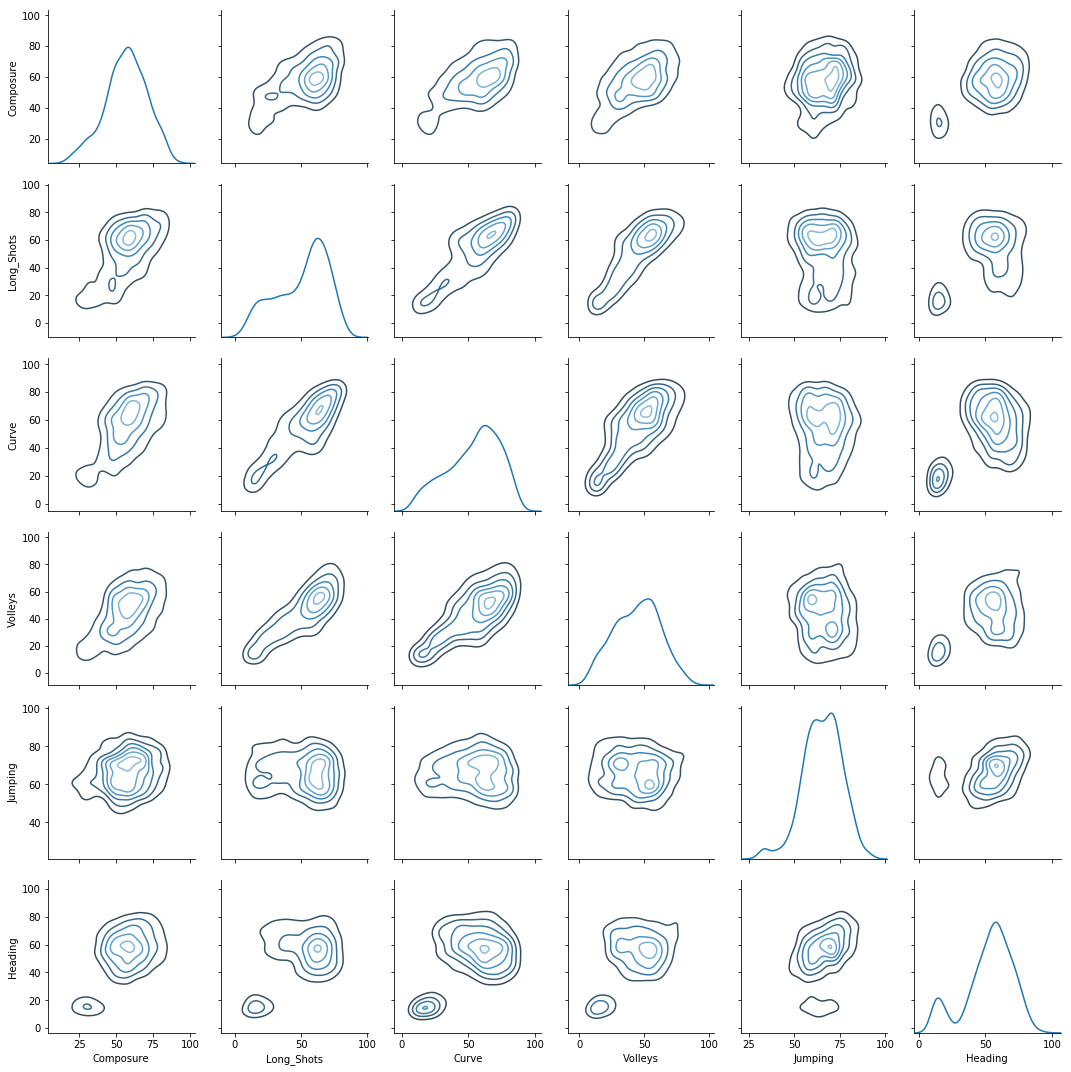

In [81]:
g = sns.PairGrid(fifa[fifa.Nationality=='Spain'][['Composure', 'Long_Shots', 'Curve', 'Volleys', 'Jumping', 'Heading']])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

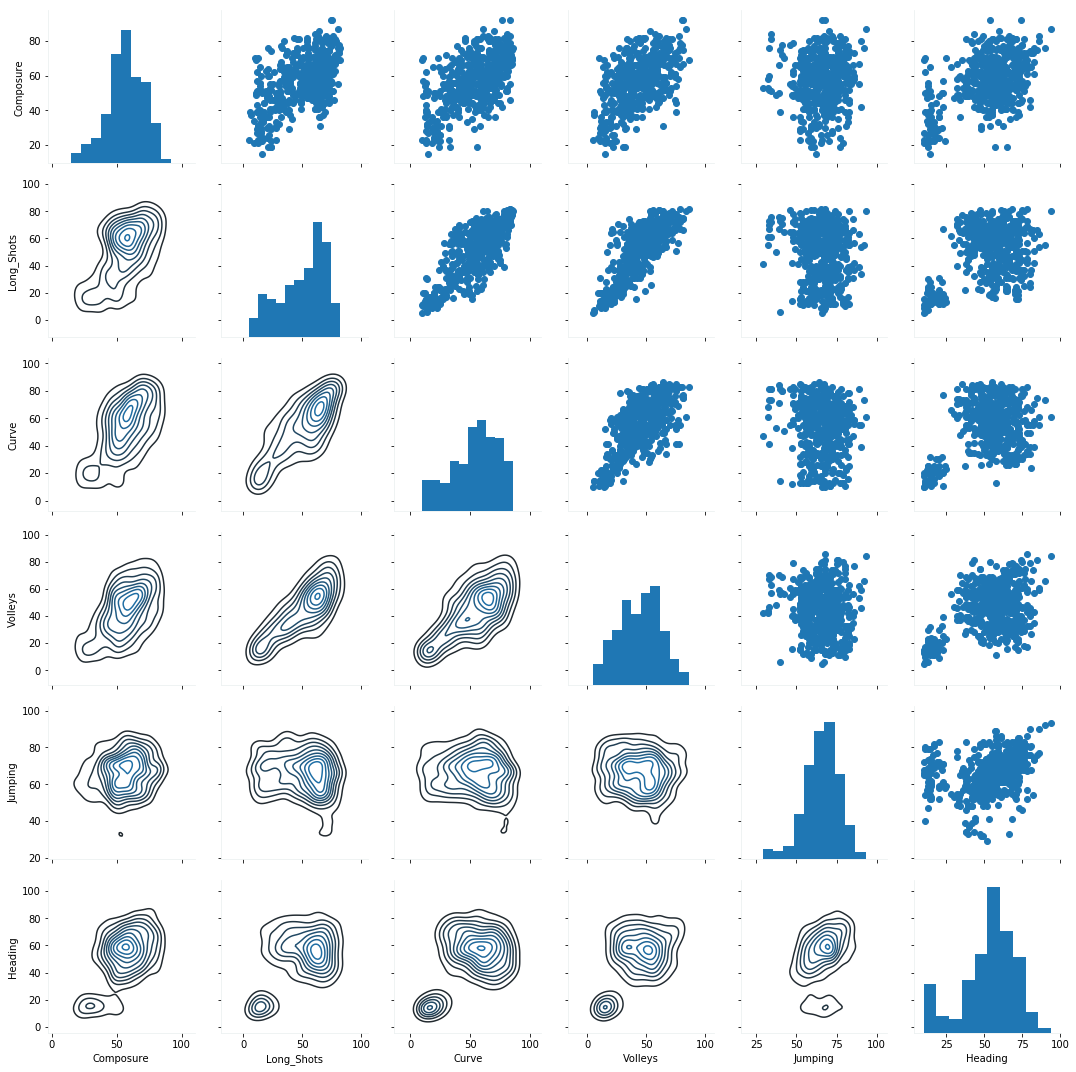

In [116]:
g = sns.PairGrid(fifa[fifa.Nationality=='Spain'][['Composure', 'Long_Shots', 'Curve', 'Volleys', 'Jumping', 'Heading', 'Club_Position']].sample(500))
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(plt.hist);

<div style="background: #f1c40f; padding: 10px; color: #2c3e50"><p>EASY: Switch out my variables for some that you are interested in.<br/></p>
</div>

In [ ]:
# Answer 9

### Parallel Coordinates

My favourite! Perfect for visualizing many variables at once.

In [117]:
spanish_players = fifa[(fifa.Nationality  == 'Spain') & (fifa.Club_Position.isin(['RF', 'CB', 'GK']))]
string_columns = [fifa.columns[idx] for idx, data_type in enumerate(fifa.dtypes) if data_type == 'object']
string_columns.pop(string_columns.index('Club_Position'))

'Club_Position'

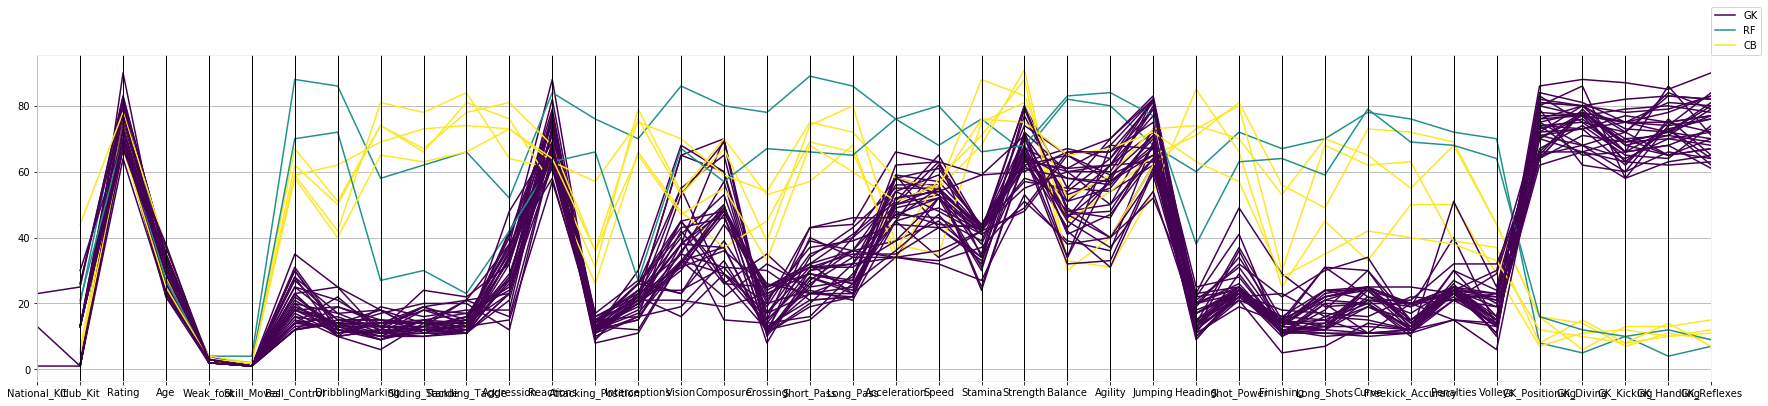

In [118]:
plt.figure(figsize=(30, 6))
g = parallel_coordinates(spanish_players.drop(string_columns + ['Contract_Expiry'], axis=1), 'Club_Position', colormap='viridis')
plt.legend(loc=(1,1))
#plt.setp(g.get_xticklabels(), rotation=90)

You can play with these if you want :D

### RadVis 

Sometimes confusing, but I think they are neat!

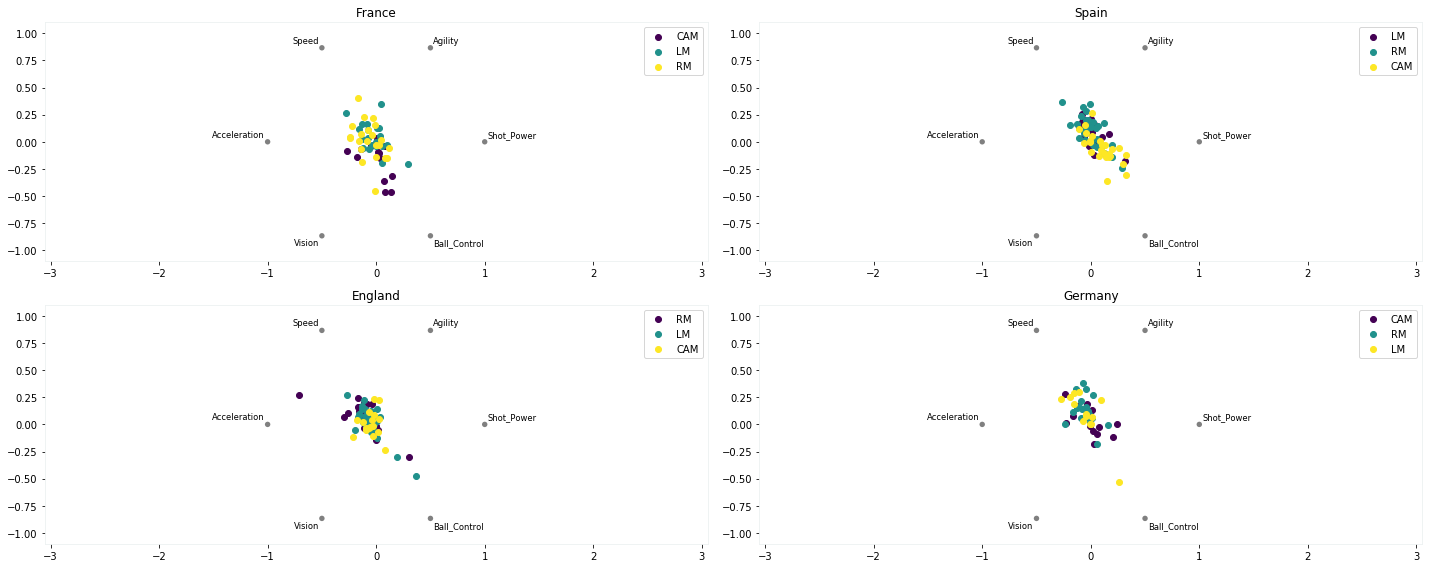

In [98]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (20,8))

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '#ecf0f1'

countries = [['France', 'Spain'], ['England', 'Germany']]
positions = ['RM', 'LM', 'CAM']
n_rows = 2
n_cols= 2

for row in range(n_rows):
    for col in range(n_cols):
        ax = axes[row, col]
        country=countries[row][col]

        players_no_gk_sub_res = fifa[(fifa.Nationality  == country) & (fifa.Club_Position.isin(positions))]
        radviz(players_no_gk_sub_res[['Shot_Power', 'Agility', 'Speed', 'Acceleration', 'Vision', 'Ball_Control', 'Club_Position']], 'Club_Position', colormap='viridis', ax=ax)
        
        ax.set_title(country)
#         if(row != 0 & col !=1):
#             legend = ax.legend()
#             legend.remove()

fig.tight_layout()

## Global Correlation Detection

While the techniques we've shown above are good for a few data points, they don't scale so well. What we often do instead is go for a global view of the data first in order to understand the relationships at a macro level.

This is a very fast process to carry out in Pandas.

In [99]:
# Correlation Tables for all variables can be quickly computed across a large dataframe
fifa.corr()

National_Kit  Club_Kit  Contract_Expiry    Rating  \
National_Kit            1.000000  0.055408        -0.027211 -0.084289   
Club_Kit                0.055408  1.000000         0.077060 -0.172710   
Contract_Expiry        -0.027211  0.077060         1.000000  0.047430   
Rating                 -0.084289 -0.172710         0.047430  1.000000   
Age                    -0.103583 -0.198230        -0.118370  0.458276   
Weak_foot               0.027268 -0.037234         0.004865  0.226411   
Skill_Moves             0.105903  0.006378         0.044511  0.252000   
Ball_Control            0.046644 -0.071067         0.035324  0.463286   
Dribbling               0.093836 -0.028584         0.048664  0.368629   
Marking                -0.162083 -0.105522         0.015409  0.236683   
Sliding_Tackle         -0.152251 -0.094920         0.011482  0.215263   
Standing_Tackle        -0.148329 -0.104446         0.008307  0.249037   
Aggression             -0.073288 -0.121709        -0.010361  0.404514   
Reactions              -0.058696 -0.148887         0.051309  0.828369   
Attacking_Position      0.124641 -0.031746         0.043698  0.354624   
Interceptions          -0.154804 -0.125007         0.006995  0.319436   
Vision                  0.076988 -0.071177         0.028113  0.489371   
Composure              -0.016093 -0.117220         0.005840  0.613693   
Crossing                0.045986 -0.067383         0.012553  0.401902   
Short_Pass              0.036071 -0.085123         0.034513  0.496192   
Long_Pass              -0.006230 -0.100525         0.016371  0.483211   
Acceleration            0.079866 -0.006315         0.071003  0.206355   
Speed                   0.056282 -0.010092         0.079394  0.224212   
Stamina                 0.003828 -0.101258         0.053830  0.355279   
Strength               -0.099086 -0.141140        -0.012495  0.369169   
Balance                 0.089038  0.010762         0.046095  0.087729   
Agility                 0.085691 -0.036128         0.047667  0.283272   
Jumping                -0.100935 -0.106797         0.002805  0.289911   
Heading                -0.072020 -0.076264         0.026235  0.343410   
Shot_Power              0.083610 -0.051829         0.021477  0.441881   
Finishing               0.138914 -0.007898         0.032341  0.328728   
Long_Shots              0.109168 -0.040658         0.028781  0.419628   
Curve                   0.081888 -0.053631         0.010840  0.420909   
Freekick_Accuracy       0.106621 -0.062077         0.007001  0.399739   
Penalties               0.095289 -0.016220         0.020878  0.340071   
Volleys                 0.117381 -0.020482         0.025120  0.386628   
GK_Positioning         -0.031492  0.004684        -0.027994 -0.018657   
GK_Diving              -0.012435  0.011290        -0.026117 -0.027657   
GK_Kicking             -0.015472  0.008788        -0.023273 -0.031752   
GK_Handling            -0.024611  0.006725        -0.023064 -0.021379   
GK_Reflexes            -0.018816  0.007480        -0.024923 -0.022995   

                         Age  Weak_foot  Skill_Moves  Ball_Control  Dribbling  \
National_Kit       -0.103583   0.027268     0.105903      0.046644   0.093836   
Club_Kit           -0.198230  -0.037234     0.006378     -0.071067  -0.028584   
Contract_Expiry    -0.118370   0.004865     0.044511      0.035324   0.048664   
Rating              0.458276   0.226411     0.252000      0.463286   0.368629   
Age                 1.000000   0.086377    -0.015930      0.083066   0.004740   
Weak_foot           0.086377   1.000000     0.336958      0.367495   0.363454   
Skill_Moves        -0.015930   0.336958     1.000000      0.727139   0.762636   
Ball_Control        0.083066   0.367495     0.727139      1.000000   0.931120   
Dribbling           0.004740   0.363454     0.762636      0.931120   1.000000   
Marking             0.131220   0.026852     0.032755      0.355324   0.228470   
Sliding_Tackle      0.096527   0.025792     0.042994      0.35

<p style="color:#f1c40f; font-size: 2em">Exercise 6</p>

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">MEDIUM: So, you can quickly calculate all feature correlations using Pandas, but reading all these numbers is a cognitively demanding task. How can we visualize such data? Hint, have a look at the seaborn gallery :)</p>

In [10]:
# Answer 10

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">MEDIUM: Remember in our lectures how we showed it was easier for people to compare heatmaps when related information is placed together? <br/>What component in seaborn could help you do this?<br/>Can you find the surprising relationship using this plot?</p>

In [11]:
# Answer 11

> You're almost on the cusp of data science now :D

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">ADVANCED: At the macro level, we always lose information, since we lose granularity. Can you partition the data on some level to see how correlations change?</p>

In [12]:
# Answer 11
# Hint, you can for instance, query the dataframe by some Nationalities, and plot each correlation heatmap in 
# a separate plot.

## Faceted Visualizations

How you split the data can also provide many insights, and there are many ways in which we could split this data (which is why I chose it :)).

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


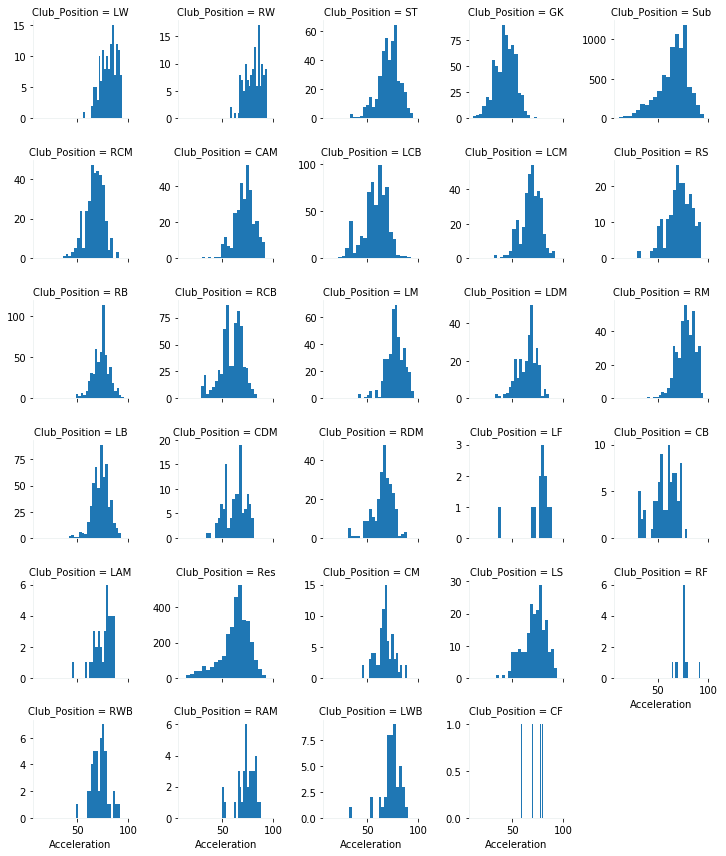

In [100]:
# or with linear regression
g = sns.FacetGrid(fifa, col="Club_Position", size=2, aspect=1, col_wrap=5, sharex=True, sharey=False)
g.map(plt.hist, 'Acceleration', bins=20).add_legend()

> Cool, right? You can play with this more

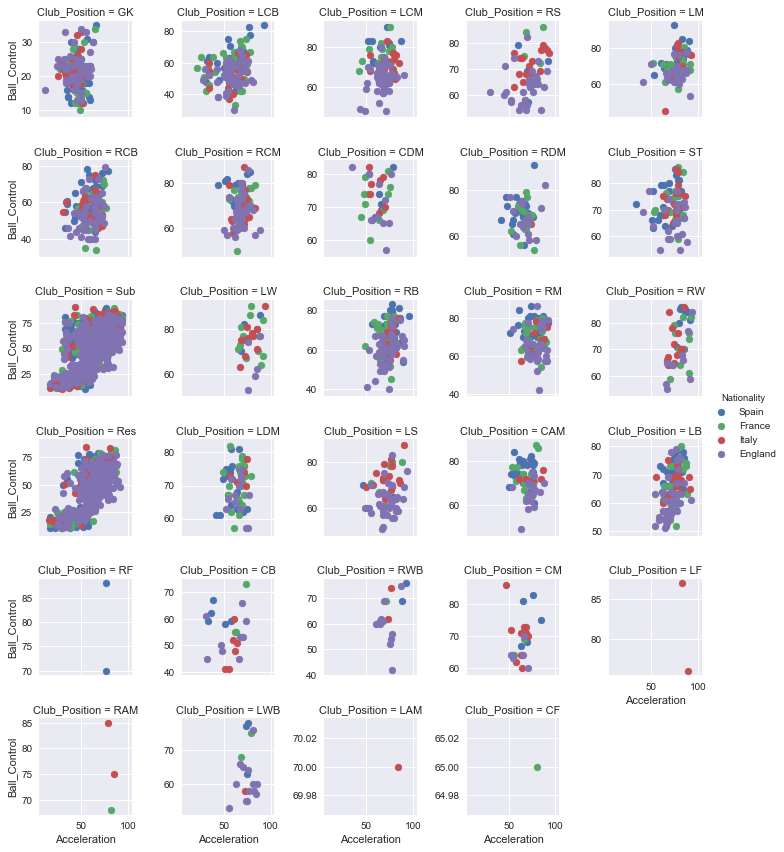

In [51]:
g = sns.FacetGrid(fifa[fifa.Nationality.isin(['Spain', 'Italy', 'England', 'France'])], col="Club_Position", 
                  hue="Nationality", size=2, aspect=1, col_wrap=5, sharex=True, sharey=False)
g.map(plt.scatter, 'Acceleration', 'Ball_Control').add_legend()

## Building a Scouting System

** Clustering with Seaborn, with scipy in the back office) **

Seaborn also has some great tools available to help in some common tasks such as data clustering.

With this in mind, we'll have a look at how we can use seaborn to scout players to find cheaper alternatives for the expensive ones :)

In [121]:
pivoted = fifa[fifa.Club_Position == 'ST'].pivot_table(index=['Name'], values=['Ball_Control', 'Reactions', 'Strength', 'Acceleration'])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

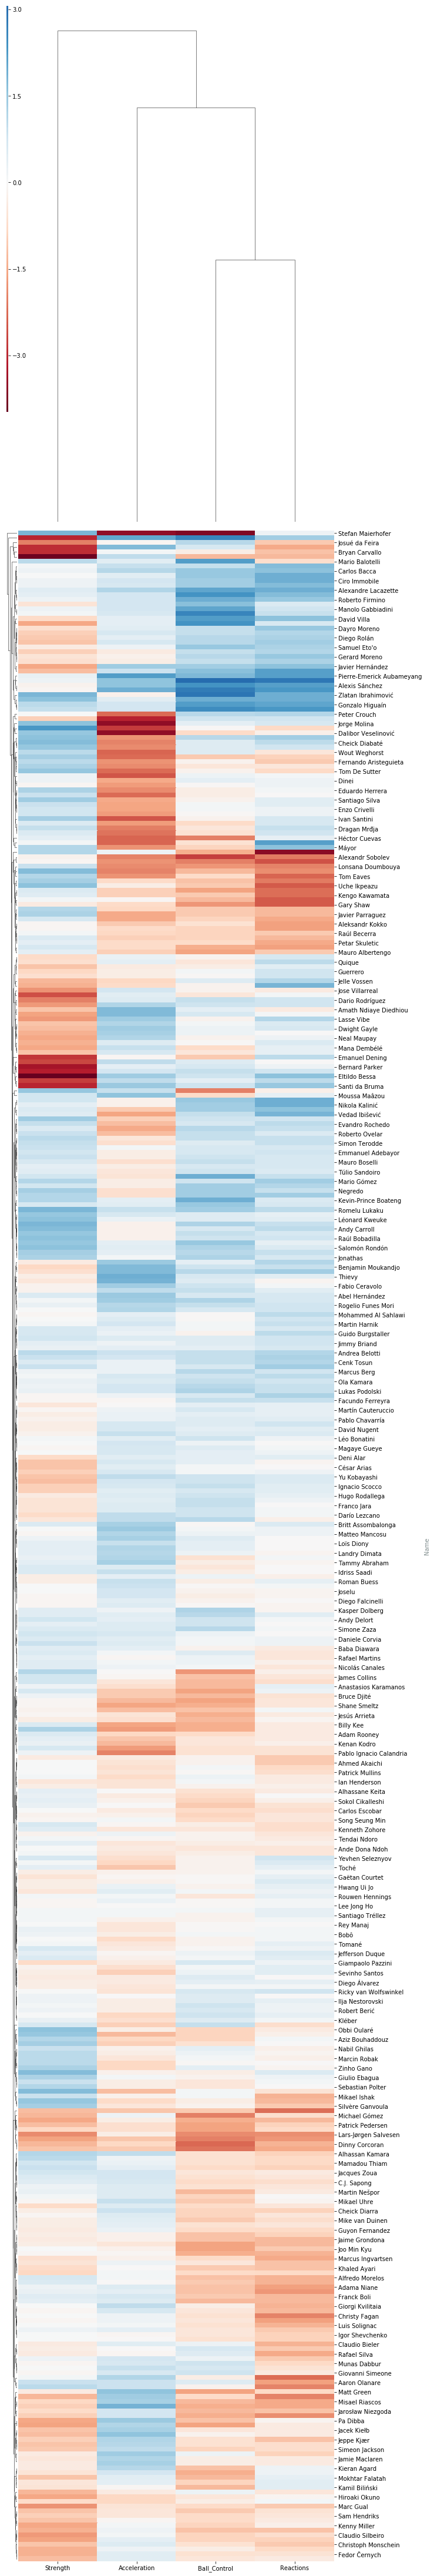

In [129]:
g = sns.clustermap(pivoted, z_score=1, figsize=(10,80), center=0, cmap="RdBu")
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

In [123]:
# We'll remove the string columns, since Parallel Coordinates etc. will not work with them
string_columns = [fifa.columns[idx] for idx, data_type in enumerate(fifa.dtypes) if data_type == 'object']
string_columns.pop(string_columns.index('Name'))
filtered_data = fifa[fifa.Name.isin(['Romelu Lukaku', 'Artem Dzyuba', 'Diego Costa', 'Christian Benteke', 'Negredo', 'Nino', 'Alexandre Lacazette'])].drop(string_columns + ['Contract_Expiry'], axis=1)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

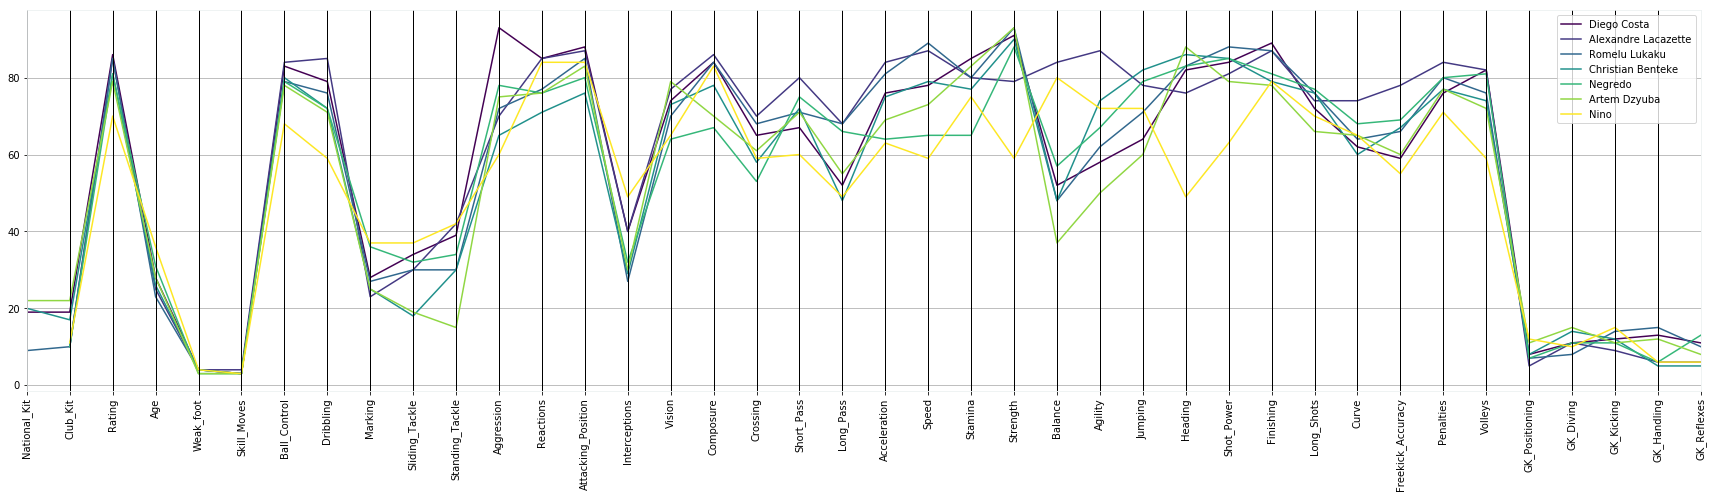

In [124]:
fig = plt.figure(figsize=(30, 7))
pc = parallel_coordinates(filtered_data, 'Name', colormap='viridis')
plt.setp(pc.get_xticklabels(), rotation=90)

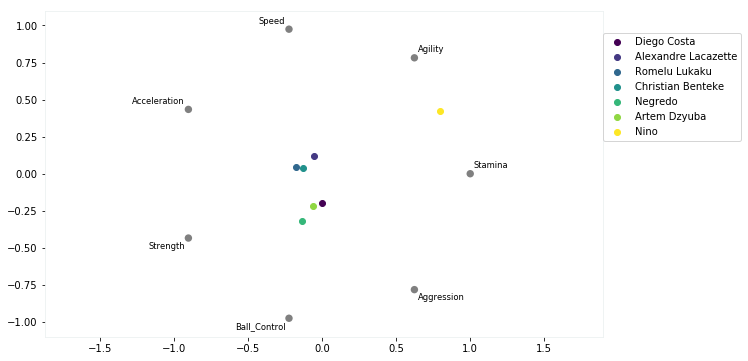

In [125]:
plt.figure(figsize=(10, 6))
radviz(filtered_data[['Stamina', 'Agility', 'Speed', 'Acceleration', 'Strength', 'Ball_Control', 'Aggression', 'Name']], 'Name',colormap='viridis')
plt.legend(loc=(1,0.6)) 

## Styling Matplotlib Plots

By default, matplotlib is undoubtedly ugly. But, all is not lost, you can clean up matplotlib plots 

In [126]:
pd.set_option("display.max_columns",None)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '#ecf0f1'
plt.rcParams['grid.color'] = '#ecf0f1'
plt.rcParams['axes.labelcolor'] = '#7f8c8d'
plt.rcParams['text.color'] = '#7f8c8d'

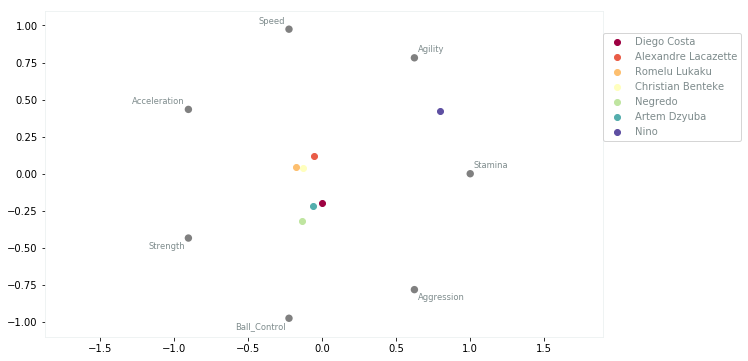

In [127]:
plt.figure(figsize=(10, 6))
radviz(filtered_data[['Stamina', 'Agility', 'Speed', 'Acceleration', 'Strength', 'Ball_Control', 'Aggression', 'Name']], 'Name', colormap='Spectral')
plt.legend(loc=(1,0.6)) 

> Wow, I hear you say, how beautiful :D

## Your Own Exploratory Analysis

<p style="color:#f1c40f; font-size: 2em">Exercise 7</p>

<p style="background: #f1c40f; padding: 10px; color: #2c3e50">OPTIONAL: Conduct your own interesting analysis.</p>